In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import statsmodels.api as sm

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\NIMAL\Desktop\Python\GL DSE OCT22'\Mini Project\4 SLR , SLC , USL\Project 2\CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [44]:
df.shape

(205, 26)

# EDA

#### Null Value treatment

In [45]:
pd.DataFrame((df.isnull().sum() * 100) / df.value_counts().sum() , columns = ['Percentage of missing values'])

,Percentage of missing values
car_ID,0.0
symboling,0.0
CarName,0.0
fueltype,0.0
aspiration,0.0
doornumber,0.0
carbody,0.0
drivewheel,0.0
enginelocation,0.0
wheelbase,0.0


####  Outlier Removal

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

UpperLimit = Q3 + 1.5 * IQR
LowerLimit = Q1 - 1.5 * IQR

In [47]:
df_treated = df[~((df < LowerLimit) | (df > UpperLimit)).any(axis = 1)]
df_treated.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
df_treated.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,102.093525,0.848921,97.648201,171.489209,65.294964,53.580576,2408.762590,115.683453,3.266331,3.266187,8.971367,96.949640,5220.503597,25.726619,31.568345,10922.510791
std,62.306267,1.233081,4.528610,10.695683,1.514391,2.432476,403.637439,26.215671,0.246286,0.185484,0.532701,29.362384,409.170819,5.533568,5.608030,4500.010567
min,1.000000,-2.000000,86.600000,144.600000,61.800000,48.800000,1819.000000,70.000000,2.680000,2.680000,7.500000,60.000000,4200.000000,16.000000,22.000000,5195.000000
25%,45.500000,0.000000,94.500000,165.300000,63.900000,51.800000,2026.000000,92.000000,3.050000,3.150000,8.700000,70.000000,5000.000000,21.000000,28.000000,7372.000000
50%,97.000000,1.000000,96.300000,171.700000,65.200000,53.900000,2370.000000,110.000000,3.190000,3.270000,9.000000,90.000000,5200.000000,25.000000,32.000000,9258.000000
75%,162.500000,2.000000,100.100000,177.550000,66.500000,55.100000,2712.000000,130.000000,3.430000,3.400000,9.400000,114.000000,5500.000000,31.000000,37.000000,13572.000000
max,205.000000,3.000000,114.200000,198.900000,68.900000,59.800000,3296.000000,181.000000,3.940000,3.580000,10.100000,175.000000,6000.000000,38.000000,47.000000,24565.000000


#### Scaling the data

In [49]:
ss = StandardScaler()
for i in df_treated.select_dtypes(include = np.number).columns:
    df_treated[i] = ss.fit_transform(df_treated[[i]]) 
df_treated.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.628394,1.750785,alfa-romero giulia,gas,std,two,convertible,rwd,front,-2.005234,...,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.857261,-0.817554,0.573730
1,-1.612286,1.750785,alfa-romero stelvio,gas,std,two,convertible,rwd,front,-2.005234,...,0.548082,mpfi,0.829953,-3.171746,0.053945,0.480246,-0.540853,-0.857261,-0.817554,1.243922
2,-1.596178,0.122965,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,-0.697695,...,1.390309,mpfi,-2.389303,1.102793,0.053945,1.950001,-0.540853,-1.219999,-0.996515,1.243922
3,-1.580071,0.936875,audi 100 ls,gas,std,four,sedan,fwd,front,0.476875,...,-0.255863,mpfi,-0.311049,0.724036,1.937962,0.172623,0.685550,-0.313155,-0.280672,0.675207
4,-1.563963,0.936875,audi 100ls,gas,std,four,sedan,4wd,front,0.388228,...,0.777780,mpfi,-0.311049,0.724036,-1.830071,0.616968,0.685550,-1.401368,-1.712357,1.455796


### Visuvalization

#### UNIVARIATE ANALYSIS

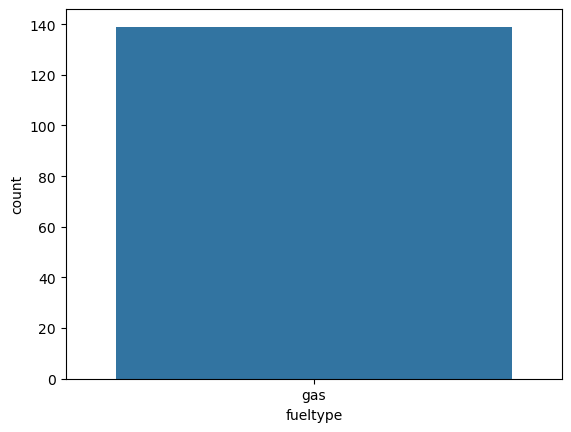

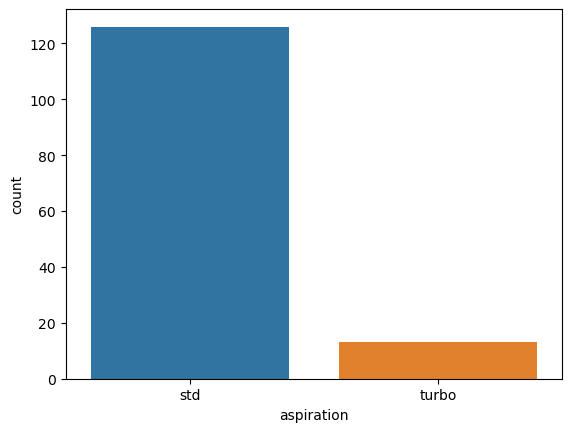

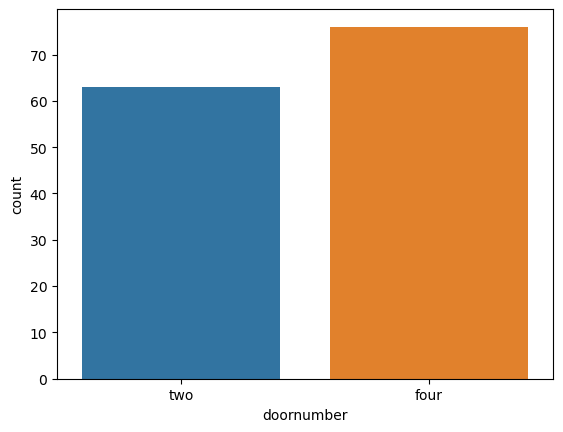

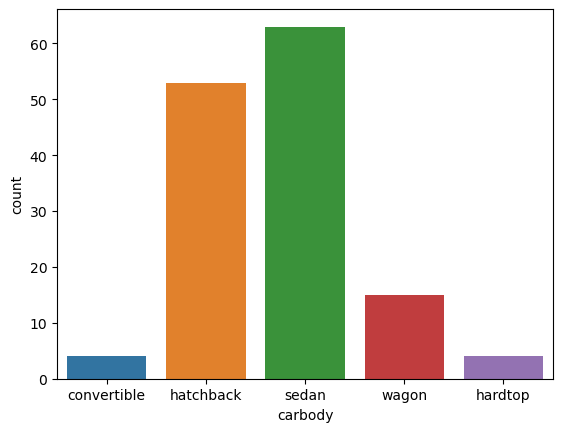

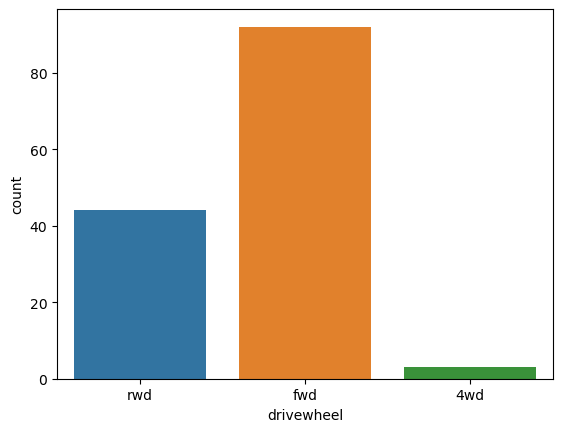

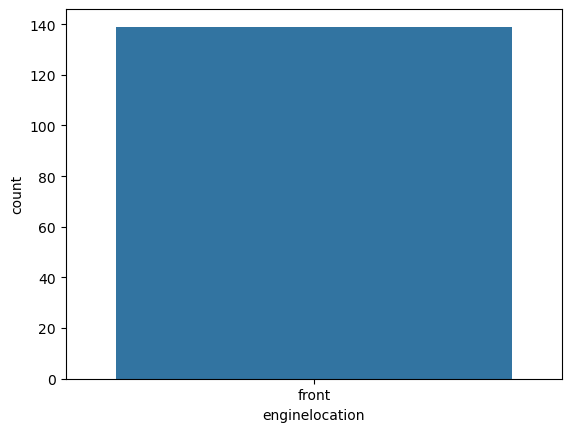

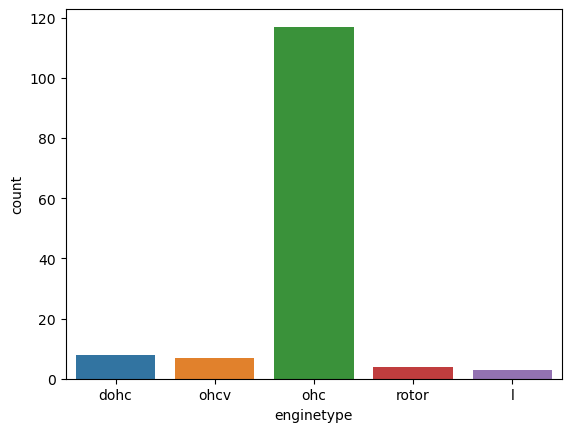

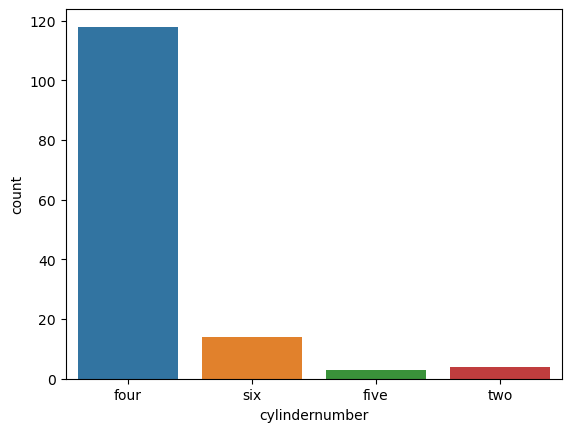

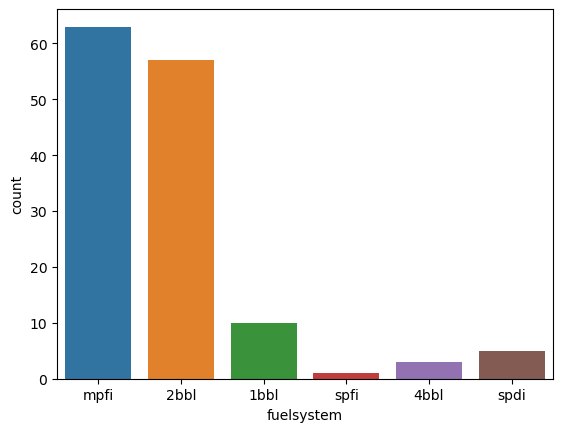

In [54]:
for i in df_treated.select_dtypes(exclude = np.number).drop(columns = ['CarName']).columns:
    sns.countplot(df_treated[i])
    plt.show()
    

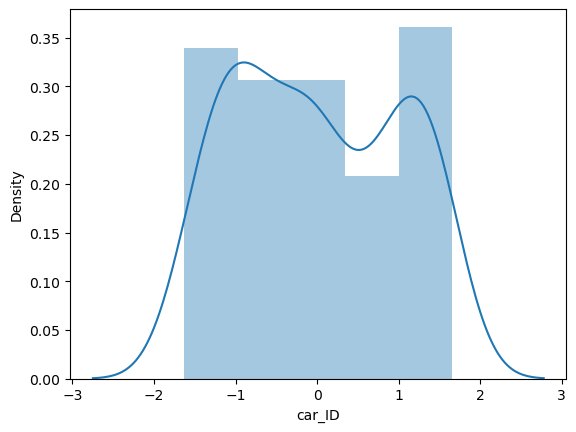

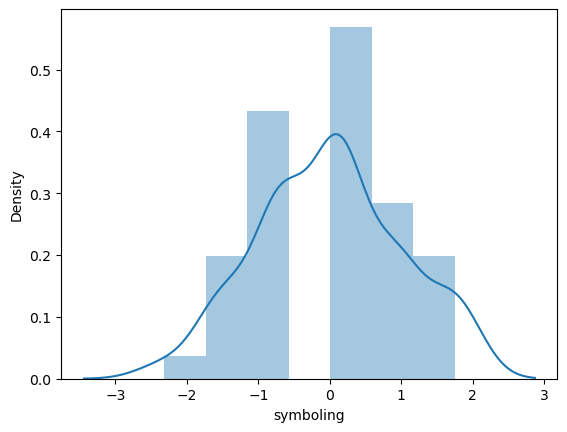

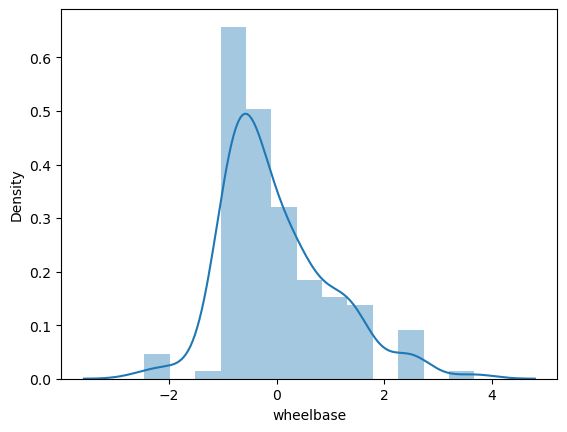

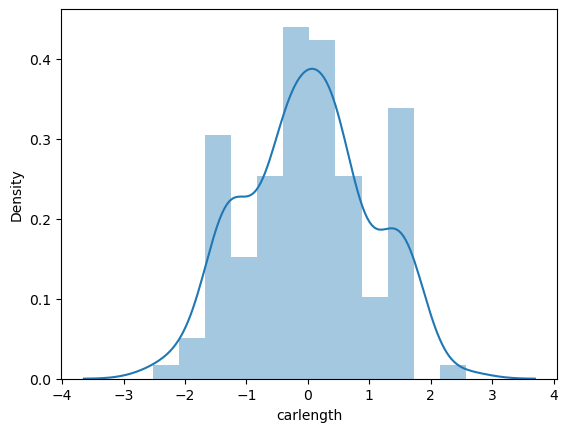

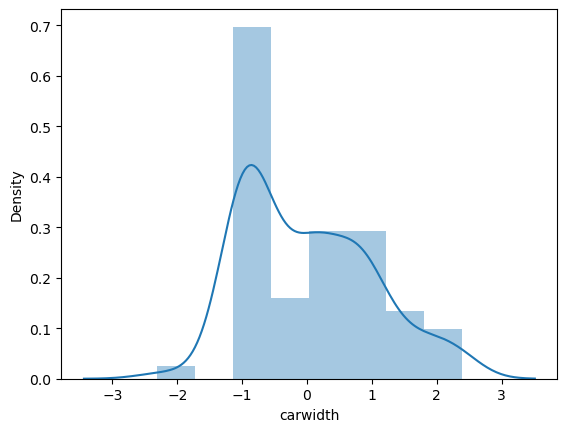

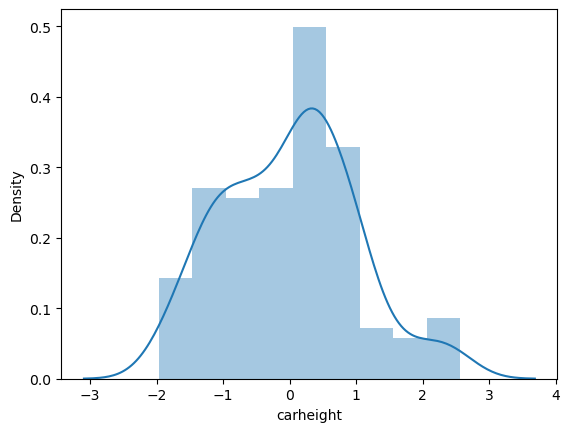

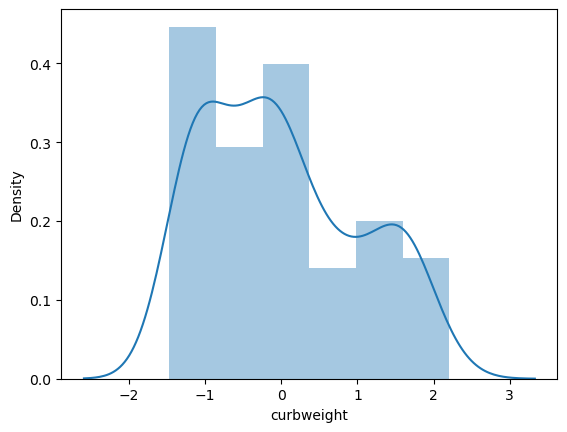

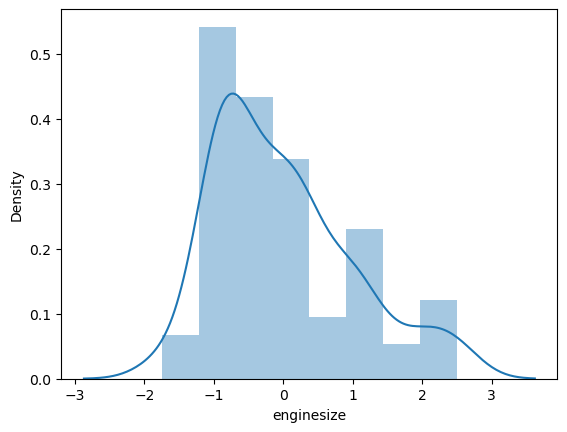

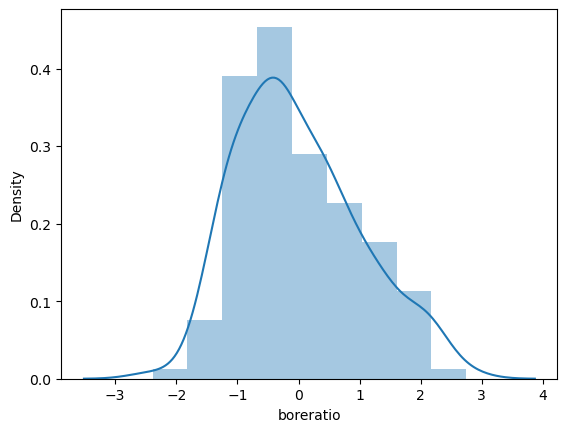

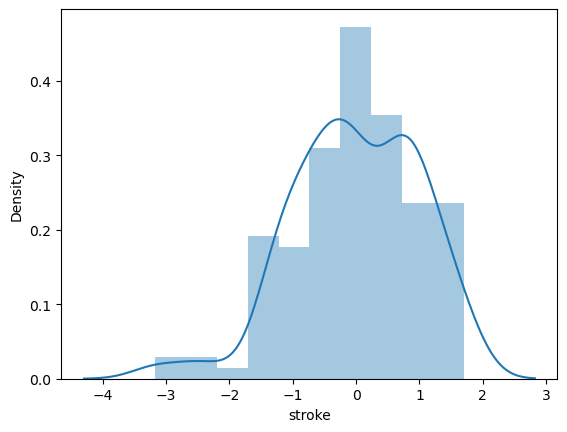

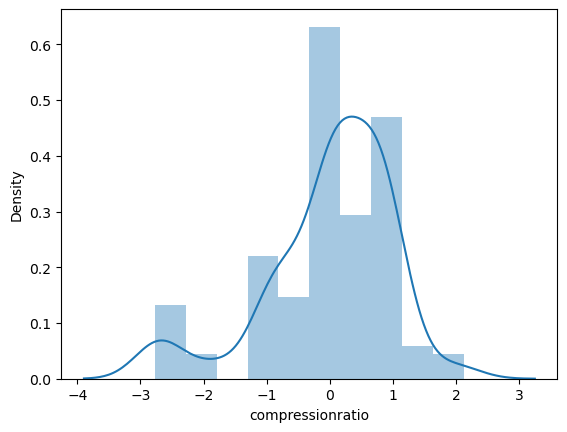

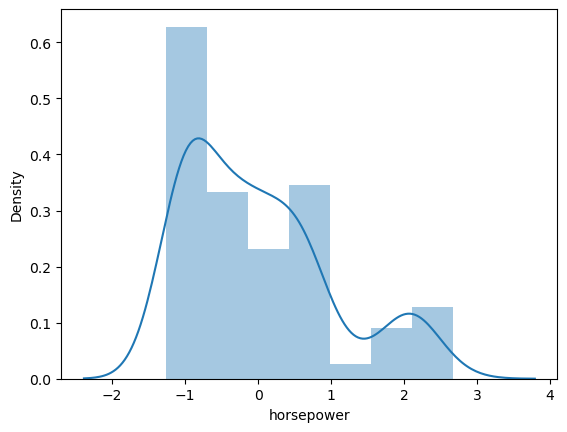

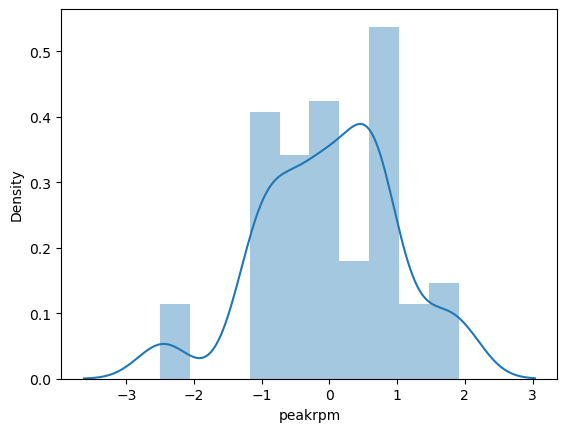

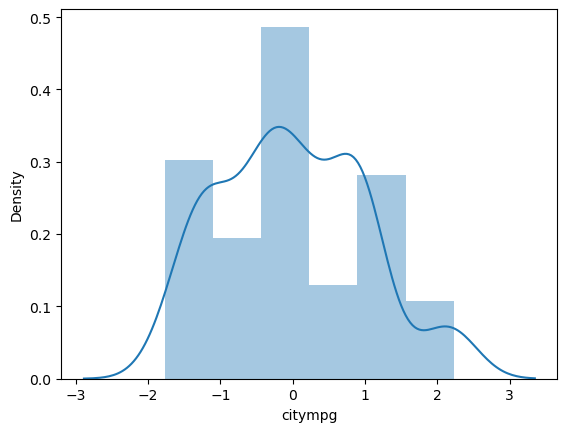

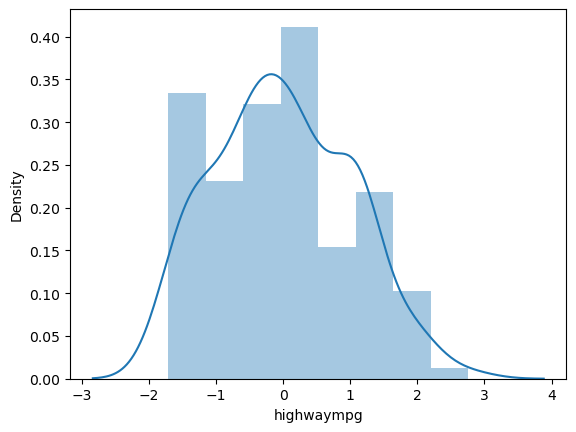

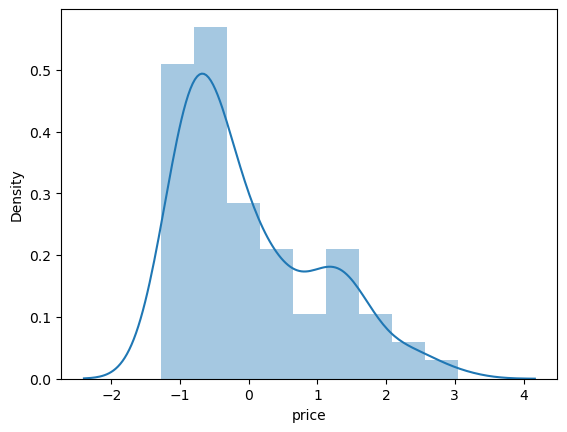

In [65]:
for i in df_treated.select_dtypes(include = np.number).columns:
    sns.distplot(df_treated[i])
    plt.show()
    

In [3]:
for i in df.select_dtypes(include = 'O').columns:
        print('column : ',i,'  :',df[i].nunique())

column :  CarName   : 147
column :  fueltype   : 2
column :  aspiration   : 2
column :  doornumber   : 2
column :  carbody   : 5
column :  drivewheel   : 3
column :  enginelocation   : 2
column :  enginetype   : 7
column :  cylindernumber   : 7
column :  fuelsystem   : 8


<AxesSubplot:xlabel='Dre'>

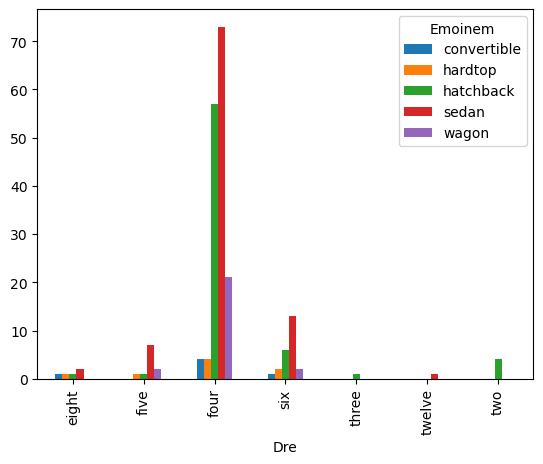

In [14]:
pd.crosstab(columns = df['carbody'] , index = df['cylindernumber'] , colnames = ['Emoinem'] , rownames =['Dre']).plot(kind = 'bar')